In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:


def time(a, c):
    a1=a[1]+c
    a0=a[0]
    while (a1>=60):
        a1=a1-60
        a0+=1
    return [a0, a1]
        

In [3]:
aaa=[12,45]
print(time(aaa,10))

[12, 55]


In [4]:
was_stop = -1
time_x=[]
coints_y =[]
coints_y_up=[]
coints_y_down=[]
zapuski = [[12, 40], [15, 20], [21, 9]]
with open('DATA3.txt', 'r') as file:
    # Читаем файл построчно в цикле
    timer=[]
    for line in file:
        coints_y.append(int(line.strip().split("m ")[1]))
        coints_y_up.append(round(int(line.strip().split("m ")[1])+np.sqrt(int(line.strip().split("m ")[1])),2))
        coints_y_down.append(round(int(line.strip().split("m ")[1])-np.sqrt(int(line.strip().split("m ")[1])),2))
        data_temp=int(line.strip().split("m ")[0])
        if(data_temp==5):
            was_stop+=1
            timer=zapuski[was_stop]
        time_x.append(time(timer,data_temp))

In [5]:
time_desat=[]
for sup in time_x:
    time_desat.append(round(sup[0]+sup[1]/60,2))

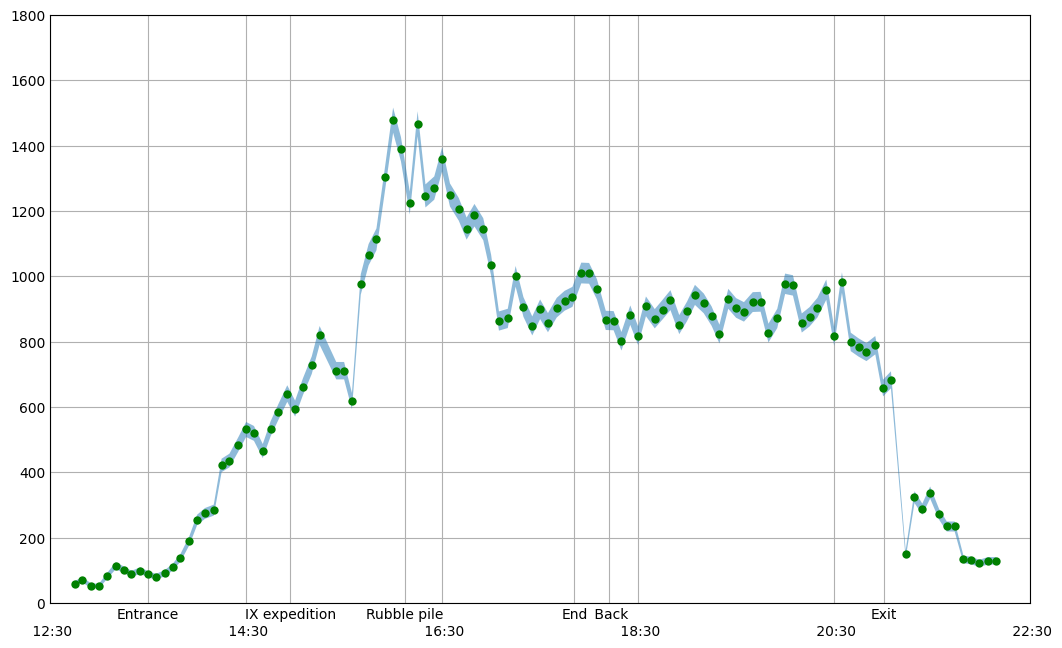

In [33]:
# plot
plt.style.use('_mpl-gallery')
fig, ax = plt.subplots(figsize=(10, 6))
ax.fill_between(time_desat, coints_y_up, coints_y_down, alpha=.5, linewidth=1)

ax.scatter(time_desat, coints_y,c="g", linewidth=0.005)

ax.set(xlim=(12.5, 22.5),
       ylim=(0, 1800))
xticks = [12.5,13.5, 14.5,14.95,16.12, 16.5, 17.85,18.2, 18.5, 20.5,21.01, 22.5]  # Позиции меток на оси X
xticklabels = ["\n 12:30","Entrance", "\n 14:30",'IX expedition',"Rubble pile", "\n 16:30","End"," Back", "\n 18:30", "\n 20:30","Exit", "\n 22:30"]  # Метки

# Установка меток и их позиций
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)
plt.savefig("exp.png")
plt.show()
